In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn library
 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Clasifications.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5547 entries, 1 to 6186
Columns: 2097 entries, Unnamed: 0 to Protein 2093
dtypes: float64(2094), int64(3)
memory usage: 88.8 MB


In [3]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(["ThirtyDay_Death"], axis=1)
y = data["ThirtyDay_Death"].values

X_norm = MinMaxScaler().fit_transform(X)

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=20)
X_reduced = selector.fit_transform(X_norm, y) #new x with the best features 


C:\Users\saber\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2094 2095] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\saber\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [5]:
#from collections import Counter
from imblearn.over_sampling import RandomOverSampler
#Resample minority class, deaths
ros = RandomOverSampler(random_state=42)

#Fit and transform X_train and y_train
X_resampled, y_resampled = ros.fit_resample(X_reduced, y)

#print('Resampled dataset shape %s' % Counter(y_resampled))

In [6]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
# Define the PLS object
model = PLSRegression(n_components=2)
# Fit the training set7
model.fit(X_train, y_train)
 
# Predictions: these won't generally be integer numbers
# "Force" binary prediction by thresholding

PLSRegression()

In [7]:
# Predictions: these won't generally be integer numbers
# "Force" binary prediction by thresholding
y_pred_test = (model.predict(X_test) > 0.5).astype('uint8')
y_pred_train = (model.predict(X_train) > 0.5).astype('uint8')

In [8]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

accuray = accuracy_score(y_pred_test, y_test)
f1 = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Test:", accuray)
print("F1 Score Test:", f1)

accuray2 = accuracy_score(y_pred_train, y_train)
f1 = f1_score(y_pred_train, y_train, average="weighted")

print("Accuracy Train:", accuray2)
print("F1 Score Train:", f1)

Accuracy Test: 0.6898181818181818
F1 Score Test: 0.6913317814987888
Accuracy Train: 0.7001870907390084
F1 Score Train: 0.7011658257534898


<AxesSubplot:>

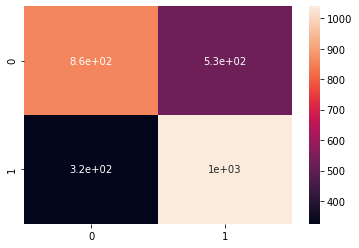

In [9]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)